# Правила

Цель игры состоит в том, чтобы набрать наибольшее общее количество очков. Очки можно получить за: 
- Прохождение маршрута между двумя соседними городами на карте; 
- Успешное завершение непрерывного пути маршрутов между двумя городами, указанными в ваших билетах назначения; 
- Завершение самого длинного непрерывного пути маршрутов, чтобы выиграть карту European Express Bonus; 
- И за каждый вокзал, оставленный в резерве на конец игры. Очки вычитаются из общего количества очков игроков за каждый из их билетов назначения, которые не были успешно завершены к концу игры.

In [5]:
from typing import Union

from collections import defaultdict
from itertools import combinations

import numpy as np
import cv2
from skimage.transform import rescale
from skimage.measure import label, find_contours
from skimage.filters import gaussian
from scipy.spatial.distance import cdist
import scipy.stats as st

import matplotlib.pyplot as plt

In [6]:
def plot_img(img, cmap='gray'):
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

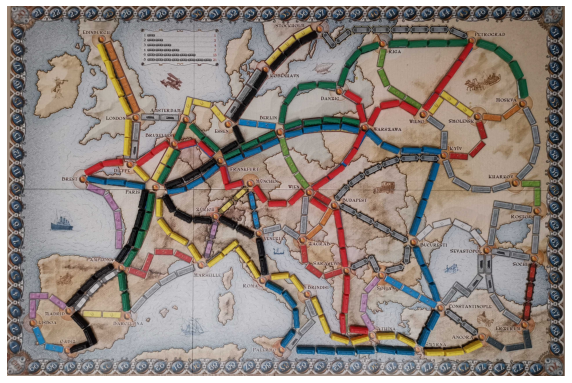

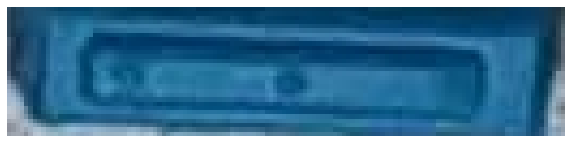

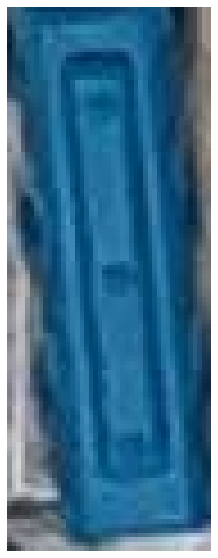

In [57]:
img = cv2.imread('train/all.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plot_img(img_rgb)
blue_template = img_rgb[2365:2395, 1995:2125]
blue_template2 = img_rgb[2100:2220, 1970:2015]
plot_img(blue_template)
plot_img(blue_template2)




In [12]:
print(img_rgb.shape)

(2546, 3846, 3)


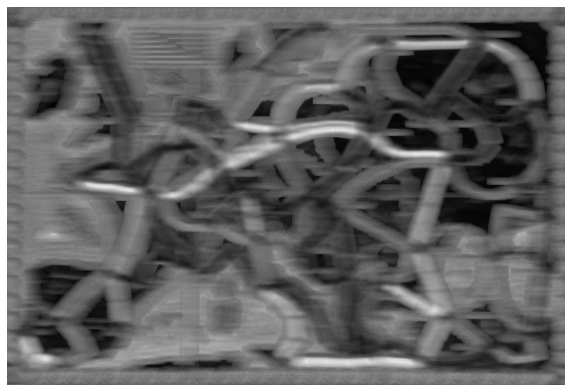

In [58]:
from skimage.feature import match_template

match_blue = match_template(img_rgb, blue_template)
match_blue2 = match_template(img_rgb, blue_template2)


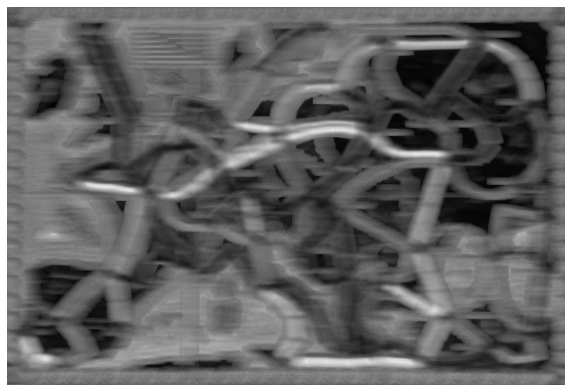

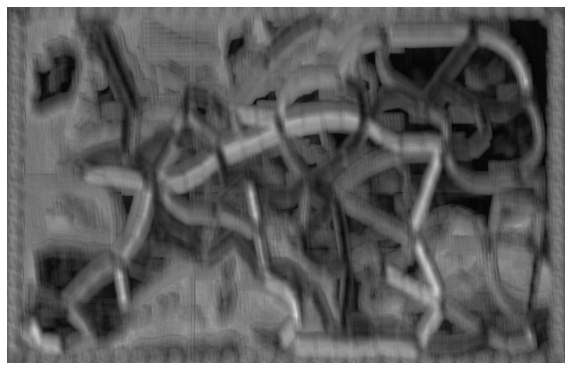

In [59]:
plot_img(match_blue)
plot_img(match_blue2)

In [81]:
print(match_blue.min(), match_blue.max())

print( (match_blue>0.3).dtype)
match_blue = cv2.resize(np.repeat((match_blue[:,:,0] > 0.3).astype(np.float64), 3, axis=2), (3846, 2546))


plot_img( img_rgb * match_blue)

-0.8495742485654945 0.9999999999999994
bool


TypeError: _repeat_dispatcher() got multiple values for argument 'axis'